In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Intestine_Intestine_HCLFetalIntestine4"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/db_v1/Intestine_Intestine_HCLFetalIntestine4/")

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [3]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


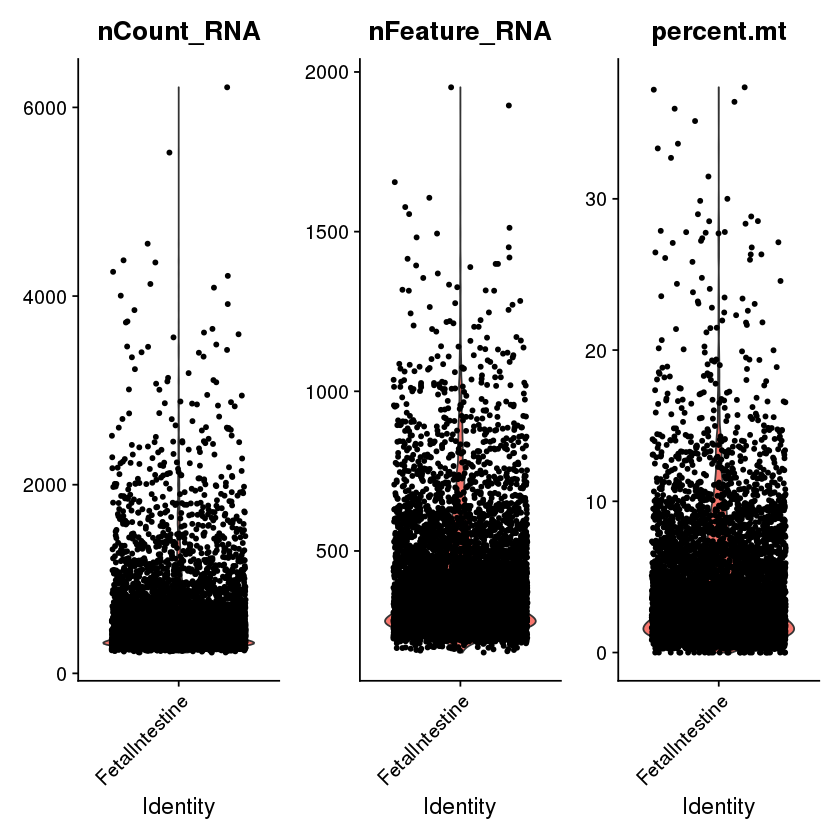

In [12]:
# Pre-processing
min.cells = 10
min.features = 100
nFeature_RNA_range = c(min.features, 1000)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [13]:
percent.mt.thre = 10
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [14]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 13742 by 6379

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 6379 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 19 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 13742 genes



  |======================================================================| 100%


Computing corrected count matrix for 13742 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.446362 mins

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  COL3A1, COL1A2, SPARC, LGALS1, COL1A1, IFITM3, STMN1, TUBA1B, PTN, BEX3 
	   VIM, DCN, LAPTM4A, TUBB, MDK, HSPB1, ID3, MFAP4, HMGB2, H2AFZ 
	   NREP, CXCL14, H3F3B, HMGB1, TMSB15A, IGFBP7, FOS, CCL2, ACTA2, JUNB 
Negative:  FTL, RPS29, RPS27, RPS18, RPS6, RPL34, RPL27A, FABP1, RPS14, RPS3A 
	   RPL31, RPS27A, RBP2, RPL7, RPS3, RPL41, RPL37A, RPS26, RPL37, RPL26 
	   RPL39, RPS28, APOA1, RPL10, RPS15A, RPS23, TTR, S100A10, RPS25, EEF1B2 
PC_ 2 
Positive:  FABP1, RBP2, APOA1, TTR, GSTA1, S100A10, AFP, MT1G, LGALS3, MT1E 
	   SERPINA1, ANXA13, MT1H, SEPP1, GAS5, FABP2, PHGR1, GSTA2, FTL, RPS26 
	   AGR2, MT1X, MT2A, S100A14, MTTP, AADAC, CLDN4, FXYD3, APOA4, APOC3 
Negative:  TMSB4X, CD74, HLA-DRA, AIF1, HLA-DRB1, HLA-DPA1, HLA-DPB1, B2M, CST3, ARHGDIB 
	   HLA-DQB1, SRGN, S100A4, HLA-DQA1, RGS1, LST1, NAPSB, TYROBP, HLA-DMA, FCER1G 
	   TMSB10, HLA-DRB6, CD53, CORO1A, JAML, LSP1, LCP1, COTL1, CD48, HLA-DQA2 
PC_ 3 
Positive:  COL3A1, COL1A2, COL1A1, FOS, DCN, SPARC, LGA

png 
  2

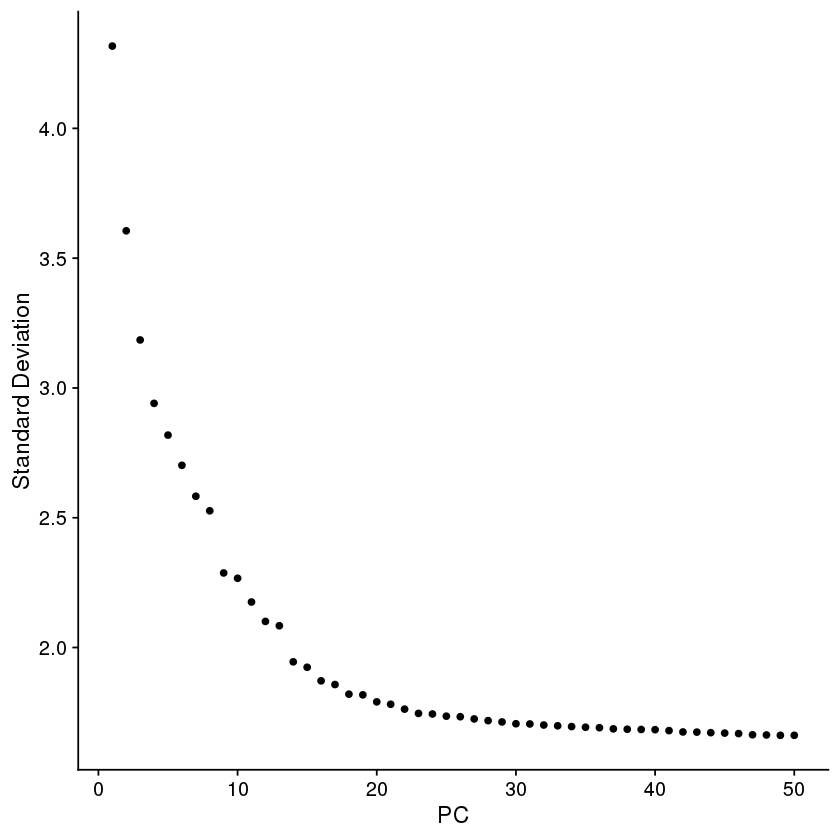

In [15]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [18]:
pcDim = 30 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [23]:
dataobj <- FindClusters(dataobj, resolution = 0.59, n.start = 5)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6379
Number of edges: 268119

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.8008
Number of communities: 18
Elapsed time: 0 seconds


ARI 
0.4022725

In [24]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

09:37:29 UMAP embedding parameters a = 0.9922 b = 1.112

09:37:29 Read 6379 rows and found 30 numeric columns

09:37:29 Using Annoy for neighbor search, n_neighbors = 30

09:37:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

09:37:31 Writing NN index file to temp file /tmp/RtmpaMX93x/file4b90507a6513

09:37:31 Searching Annoy index using 1 thread, search_k = 3000

09:37:33 Annoy recall = 100%

09:37:34 Commencing smooth kNN distance calibration using 1 thread

09:37:35 Initializing from normalized Laplacian + noise

09:37:35 Commencing optimization for 500 epochs, with 288680 positive edges

09:37:58 Optimization finished



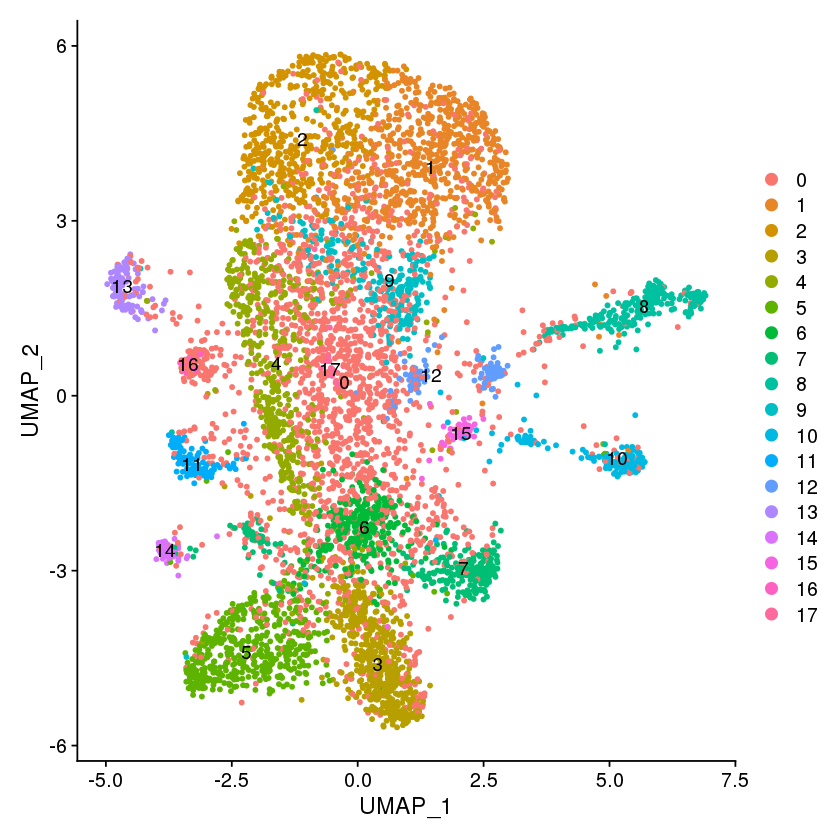

In [25]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

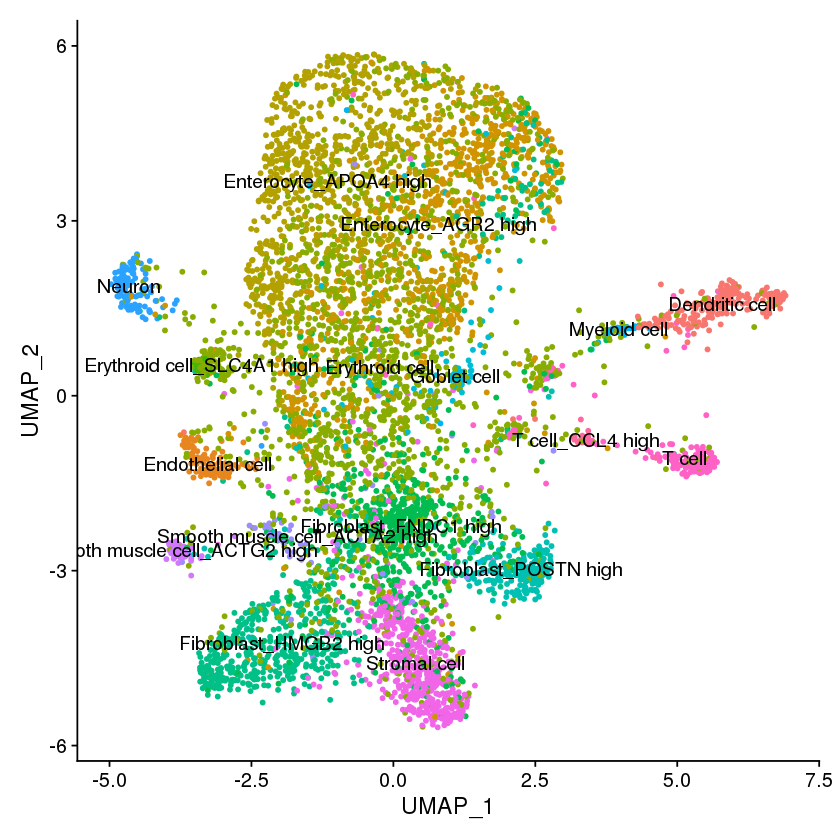

In [26]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [4]:
new.cluster.ids <- c("Intestine-Connective tissue-Erythrocyte-GC", 
                     "Intestine-Epithelial tissue-Enterocyte-RPS18", 
                     "Intestine-Epithelial tissue-Enterocyte-RBP2", 
                      "Intestine-Connective tissue-Stromal cell-CXCL14", 
                     "Intestine-Epithelial tissue-Enterocyte-SI", 
                     "Intestine-Connective tissue-Fibroblast-DCN", 
                     "Intestine-Connective tissue-Fibroblast-FNDC1",
                     "Intestine-Connective tissue-Fibroblast-POSTN",
                    "Intestine-Connective tissue-Dendritic cell-HLA-DRB1",
                    "Intestine-Epithelial tissue-Enterocyte-AGR2",
                     'Intestine-Connective tissue-T cell-CD3D',
                     "Intestine-Epithelial tissue-Endothelial cell-CD34",
                    "Intestine-Epithelial tissue-Goblet cell-TPSB2",
                     "Intestine-Nerve tissue-Neuron-STMN2",
                      "Intestine-Muscle tissue-Smooth moscle cell-CNN1",
                      'Intestine-Connective tissue-T cell-VPREB1',
                     'Intestine-Connective tissue-Erythrocyte-HBA1',
                     "Intestine-Connective tissue-Erythrocyte-GC"
                    )

In [45]:
subset(dataobj.markers,cluster=='16')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
GYPA,0.000000e+00,0.4633187,0.481,0.002,0.000000e+00,16,GYPA
HBZ,7.563234e-244,1.3220765,0.630,0.007,1.039340e-239,16,HBZ
HBM,3.425490e-218,0.8878533,0.556,0.006,4.707309e-214,16,HBM
SLC4A1,7.189051e-181,0.4396311,0.333,0.002,9.879193e-177,16,SLC4A1
AHSP,8.603874e-169,1.1238644,0.630,0.011,1.182344e-164,16,AHSP
GYPB,2.298269e-164,0.4158478,0.296,0.002,3.158281e-160,16,GYPB
HBB,1.155573e-68,1.8902663,0.815,0.057,1.587988e-64,16,HBB
HBG2,2.273046e-46,4.0766251,1.000,0.151,3.123620e-42,16,HBG2
HBA1,1.142559e-36,3.0955222,1.000,0.207,1.570104e-32,16,HBA1


In [5]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [48]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

09:57:15 UMAP embedding parameters a = 0.9922 b = 1.112

09:57:15 Read 6379 rows and found 30 numeric columns

09:57:15 Using Annoy for neighbor search, n_neighbors = 30

09:57:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

09:57:17 Writing NN index file to temp file /tmp/RtmpaMX93x/file4b9053497aac

09:57:17 Searching Annoy index using 1 thread, search_k = 3000

09:57:20 Annoy recall = 100%

09:57:20 Commencing smooth kNN distance calibration using 1 thread

09:57:21 Initializing from normalized Laplacian + noise

09:57:21 Commencing optimization for 500 epochs, with 288680 positive edges

09:57:44 Optimization finished



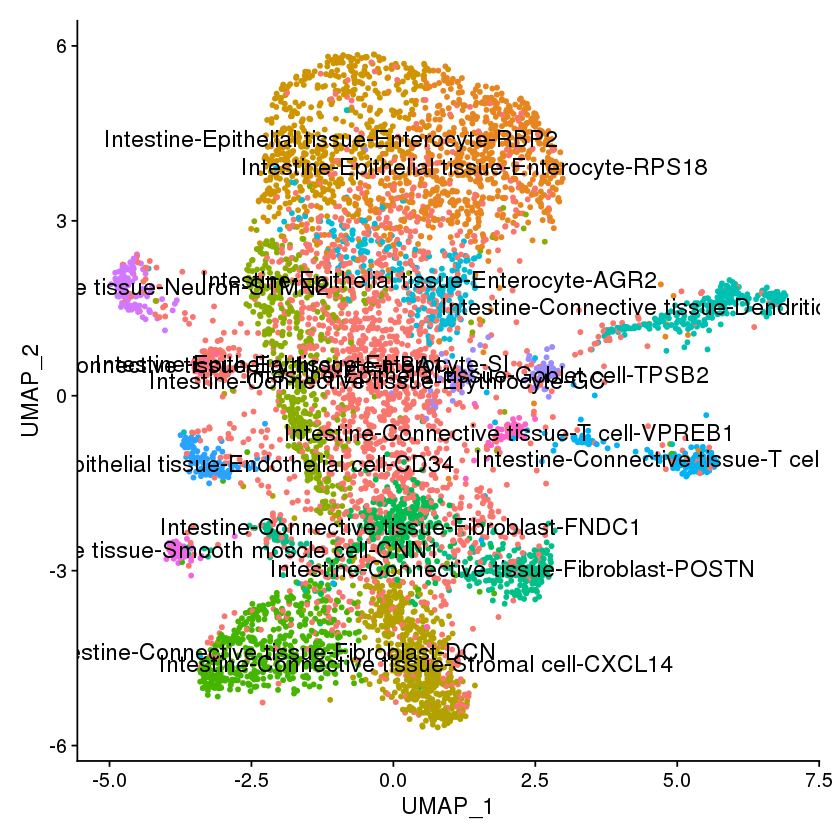

In [49]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [27]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE,)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17



In [50]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [3]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [6]:
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [3]:
dataobj.dbupload_v1 = readRDS(file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))